In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


module_path = os.path.abspath("../modules")

if module_path not in sys.path:
    sys.path.append(module_path)

import spec_tools


# Data Filtering Methods

## Savitzky-Golay Filter

Is a digital filter that smooths data points by fitting sucessive sub-sets of adjacent data points with a low-degree polynomial using linear least squares

A general polynomial has the form

\begin{equation}
y = a_0 + a_1x * a_2x^2 + ... + a_p x^p
\end{equation}

Given a window of data points centered at $x_k$ we need to determine the coefficients $a_0,a_1,...$ which best fit the data points inside the window.

This is achieved by minimizing the sum of the squares of the diffeences between the actual data points $y_i$ and the polynomial values $y_{ih}$:

\begin{equation}
\text{Minimize} ~ \sum_{i = -m}^m \left( y_{k+1} - \sum_{j=0}^p a_j x_{k+1}^j  \right)^2
\end{equation}



In [2]:
# create random data


np.random.seed(0)
x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.normal(0, 0.1, x.size)


data = np.array([x, y]).T

spectrum = spec_tools.Spectrum("Test",data)

spectrum.plot_spectrum(interactive=False)



alt.Chart(...)

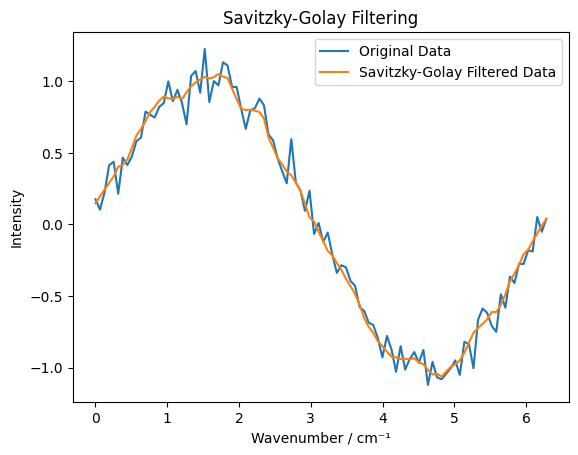

In [3]:
Baseline = spec_tools.Baseline(spectrum)

Savgol_Filtered_Data = Baseline.savgol_filter(poly_order=2)

## Moving Average Filtering

A formula for a simple moving average is given by 

\begin{equation}
\bar{y}_t = \frac{y_t + y_{t-1} + ... + y_{t-n-1}}{n}
\end{equation}

Where $y$ is the variable, and we define a window which then determines the average we are taking.

In [4]:
np.random.seed(0)

x = np.linspace(0,10,100)
y = np.sin(x) + np.random.normal(0, 0.1, x.size)
data = np.array([x, y]).T

spectrum = spec_tools.Spectrum("Test",data)
spectrum.plot_spectrum(interactive=False)

alt.Chart(...)

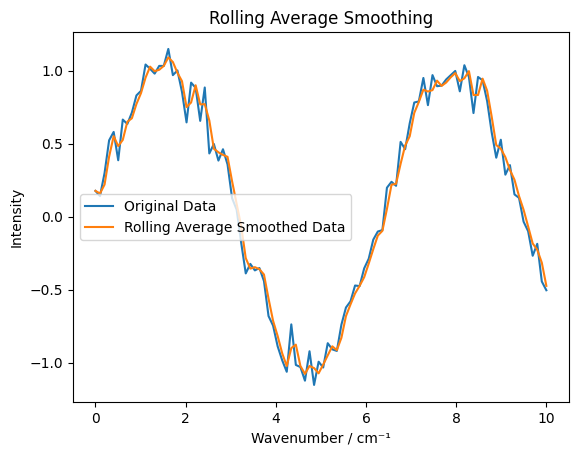

In [6]:
Baseline = spec_tools.Baseline(spectrum)

Baseline.rolling_average_smoothing(window_size=2)